<a href="https://colab.research.google.com/github/JakeSparrow1/project_team_20/blob/main/shared_group_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. BUSINESS UNDERSTANDING

# problem statement
The University of Zambia wants to quickly identify research authored by its staff in the institutional repository. Manually verifying affiliations is slow and error-prone. We aim to build a predictive model that classifies whether an ETD document was authored by UNZA staff, based on metadata and content.

### Business Objectives

**What does "success" look like from a practical perspective?**

**Primary Success Indicators:**
- **Automated Classification**: System can process references faster than manual review
- **Research Visibility**: UNZA can quickly identify and showcase internal research citations  
- **Administrative Efficiency**: Reduce reference review time from days to hours
- **Decision Support**: Enable evidence-based faculty evaluation and research planning

**Practical Success Metrics:**
- **Time Savings**: 80% reduction in manual reference verification time
- **Processing Capability**: Handle 100-200 ETDs for comprehensive analysis
- **Accuracy**: >80% classification accuracy for administrative decision-making
- **User Adoption**: Research staff can operate system with minimal training
# Data Mining Goals
Primary goal: Build a supervised classification model
- We will build and evaluate a binaer classifier that inputs parsed reference metadata and outputs 1 if UNZA-STAFF author or 0 if NON UNZA_STAFF

# **Intial Project Success Criteria**  
- **Accuracy** : The model should achieve at least 80% accuracy and F1-score ≥ 0.80 on a held-out test dataset when classifying ETDs as authored by UNZA staff or not.
  
- **Efficiency** : The model should reduce manual affiliation verification time by at least 80% compared to the current process.  
- **Processing Capability** : The model should be able to process at least 50 ETDs per hour on available university hardware or cloud resources.




# 2. Data Understanding

In this section, we load our dataset, explore its structure, and generate initial insights.  
Each of the 5 group members contributes a different part of the data understanding process.


## 2.1 DATA LOADIND

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd


Mounted at /content/drive


In [ ]:
papers_path ='/content/drive/MyDrive/papers.csv'
papers_df = pd.read_csv(papers_path,sep=',')

##DATASET OVERVIEW

In [ ]:
papers_df.shape


(468, 11)

In [ ]:
papers_df.columns

Index(['Author', 'Title', 'University', 'Department', 'Location', 'Year',
       'Type', 'Publisher', 'Repository', 'Subjects', 'ReferenceCount'],
      dtype='object')

In [ ]:
papers_df.head()

,Author,Title,University,Department,Location,Year,Type,Publisher,Repository,Subjects,ReferenceCount
0,Joseph Mumba Zulu,Evaluating training programs for educational g...,University of Zambia,Department of Sociology,Zambia,2015,Article,Zambian Journal of Science,UNZA DSpace,Biology; Genetics; Molecular Biology,12
1,Peter Zulu,Analysis of economic development in urban sett...,UNZA,Department of Physics,"Lusaka, Zambia",2019,Article,Zambian Journal of Science,UNZA DSpace,Economics; Development; Policy Analysis,20
2,David Mwamba,Analysis of economic development in rural comm...,The University of Zambia,School of Business,Zambia,2023,Article,African Journal of Research,UNZA DSpace,Agriculture; Food Security; Sustainable Develo...,20
3,Joseph Mumba Zulu,Evaluating health interventions for poverty: A...,The University of Zambia,Department of Education,"Lusaka, Zambia",2021,Article,African Journal of Research,UNZA DSpace,Medicine; Clinical Research; Healthcare,16
4,Mary Zulu,The role of policy in learning: A systematic r...,UNZA,Department of Chemistry,Zambia,2012,Article,African Journal of Research,UNZA DSpace,Engineering; Technology; Innovation,13


In [ ]:
papers_df.iloc[170:175]

,Author,Title,University,Department,Location,Year,Type,Publisher,Repository,Subjects,ReferenceCount
170,Lisa Miller,The role of technology in learning: A systemat...,Yale University,Department of Chemistry,"Berkeley, CA, USA",2023,Article,International Journal of Research,Yale University Digital Repository,Education; Pedagogy; Learning,22
171,Michael Williams,Impact of socioeconomic status on student achi...,Oxford University,School of Business,"New York, NY, USA",2019,Article,International Journal of Research,Oxford University Digital Repository,Education; Pedagogy; Learning,28
172,Emily Jones,The role of technology in learning: A systemat...,Columbia University,Department of History,"Cambridge, UK",2021,Article,International Journal of Research,Columbia University Digital Repository,Education; Pedagogy; Learning,33
173,John Williams,The role of technology in healthcare delivery:...,University of Melbourne,Department of Mathematics,"Boston, MA, USA",2019,Article,International Journal of Research,University of Melbourne Digital Repository,Medicine; Clinical Research; Healthcare,22
174,John Johnson,Analysis of health outcomes in developing coun...,Imperial College London,Department of Chemistry,"Cambridge, MA, USA",2010,Article,International Journal of Research,Imperial College London Digital Repository,Computer Science; Artificial Intelligence; Mac...,26


##Data Quality Checks


In [ ]:
papers_df.describe()


,Year,ReferenceCount
count,468.000000,468.000000
mean,2016.606838,20.365385
std,5.838963,8.602141
min,1967.000000,0.000000
25%,2013.000000,15.000000
50%,2017.000000,21.000000
75%,2021.000000,25.250000
max,2025.000000,46.000000


In [ ]:
papers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Author          468 non-null    object
 1   Title           468 non-null    object
 2   University      465 non-null    object
 3   Department      411 non-null    object
 4   Location        468 non-null    object
 5   Year            468 non-null    int64 
 6   Type            468 non-null    object
 7   Publisher       468 non-null    object
 8   Repository      461 non-null    object
 9   Subjects        468 non-null    object
 10  ReferenceCount  468 non-null    int64 
dtypes: int64(2), object(9)
memory usage: 40.3+ KB


In [ ]:
print(papers_df.isnull().sum())

Author             0
Title              0
University         3
Department        57
Location           0
Year               0
Type               0
Publisher          0
Repository         7
Subjects           0
ReferenceCount     0
dtype: int64


In [ ]:
print(papers_df.duplicated().sum())

0


In [ ]:
print(papers_df.nunique())

Author            237
Title             204
University         36
Department         24
Location           36
Year               25
Type                9
Publisher          46
Repository         74
Subjects           29
ReferenceCount     37
dtype: int64


In [ ]:
print(papers_df.dtypes)

Author            object
Title             object
University        object
Department        object
Location          object
Year               int64
Type              object
Publisher         object
Repository        object
Subjects          object
ReferenceCount     int64
dtype: object


# 2.3 DATA VISUALIZATION


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## 2.3.1 Bar chart for missing values

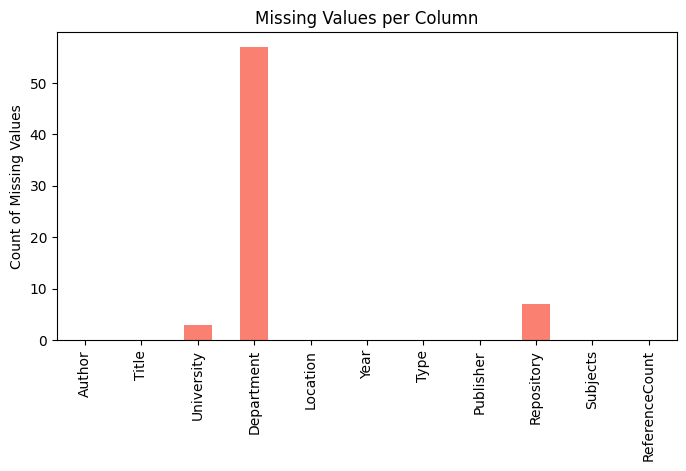

In [ ]:
plt.figure(figsize=(8,4))
papers_df.isnull().sum().plot(kind='bar', color='salmon')
plt.title("Missing Values per Column")
plt.ylabel("Count of Missing Values")
plt.show()

## 2.3.2 University distribution - Horizontal Bar

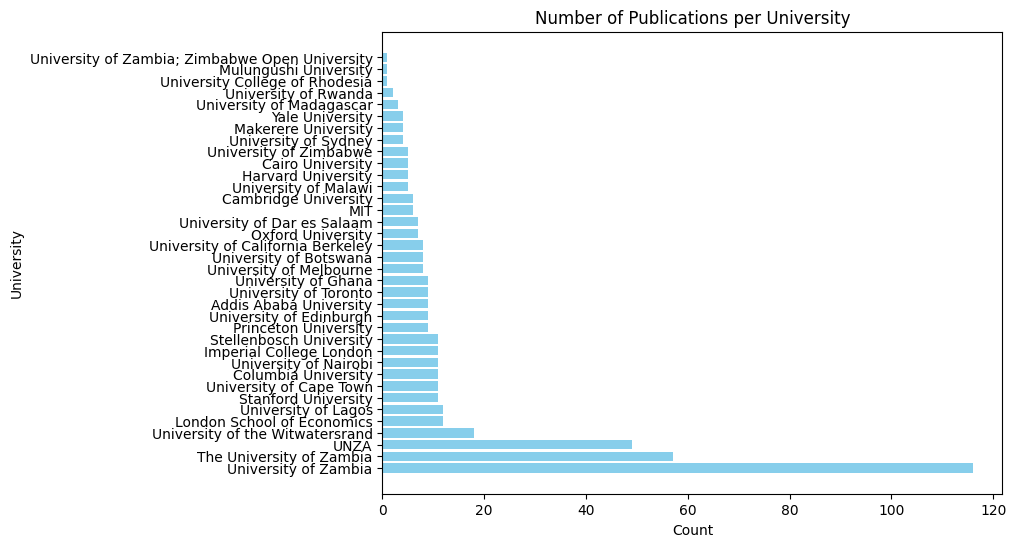

In [ ]:
uni_counts = papers_df['University'].value_counts()
plt.figure(figsize=(8,6))
plt.barh(uni_counts.index, uni_counts.values, color='skyblue')
plt.xlabel("Count")
plt.ylabel("University")
plt.title("Number of Publications per University")
plt.show()

## 2.3.3 Top 10 Authors by publications

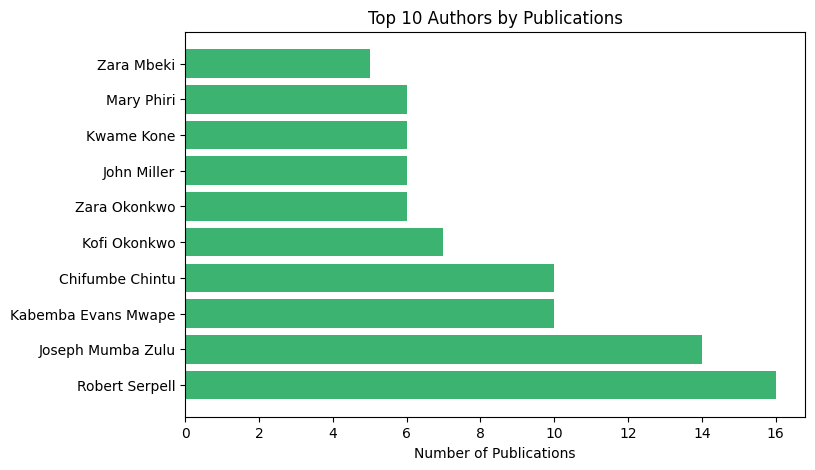

In [ ]:
top_authors = papers_df['Author'].value_counts().head(10)
plt.figure(figsize=(8,5))
plt.barh(top_authors.index, top_authors.values, color='mediumseagreen')
plt.xlabel("Number of Publications")
plt.title("Top 10 Authors by Publications")
plt.show()

## 2.3.4 Top 10 Repositories

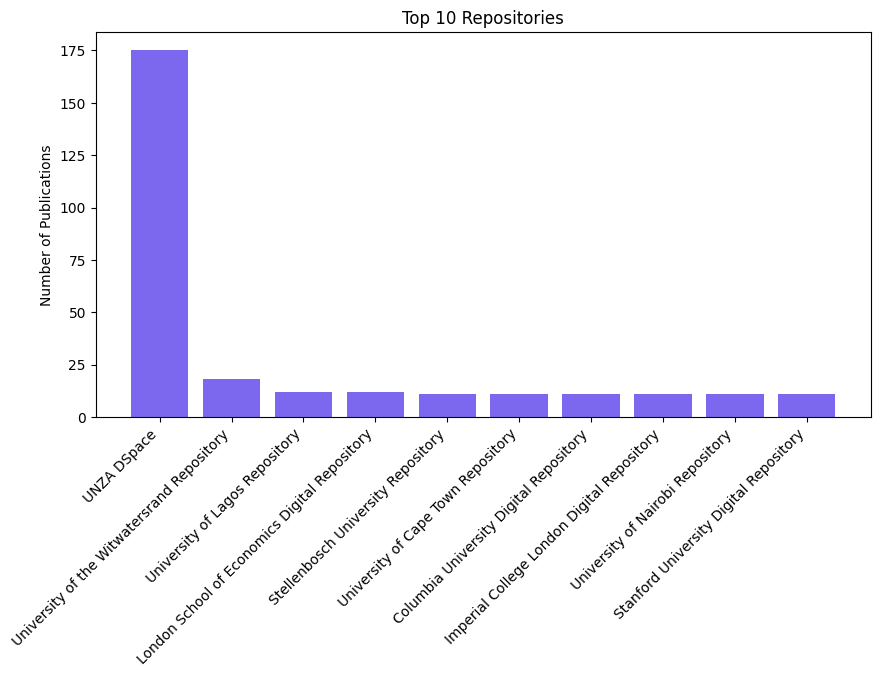

In [ ]:
repo_counts = papers_df['Repository'].value_counts().head(10)
plt.figure(figsize=(10,5))
plt.bar(repo_counts.index, repo_counts.values, color='mediumslateblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Number of Publications")
plt.title("Top 10 Repositories")
plt.show()


## 1.3.5 Top 10 Subjects

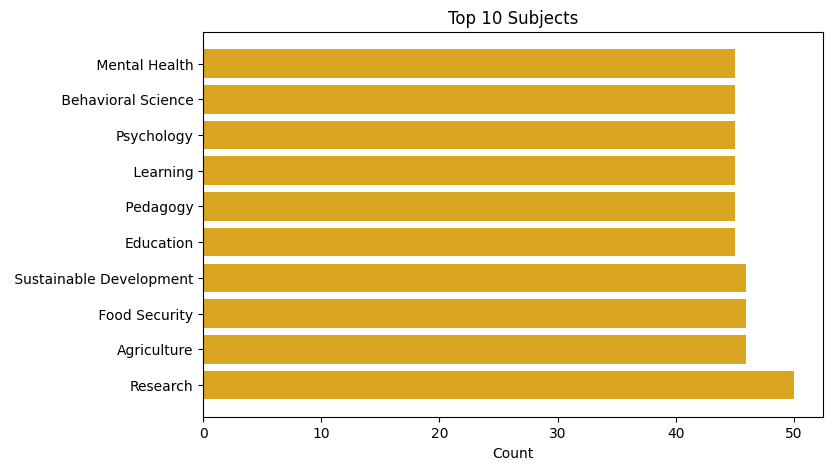

In [ ]:
from collections import Counter
# Split multi-subject entries
all_subjects = papers_df['Subjects'].str.split(';').sum()
subject_counts = Counter(all_subjects)
top_subjects = dict(subject_counts.most_common(10))

# Horizontal bar with Matplotlib
plt.figure(figsize=(8,5))
plt.barh(list(top_subjects.keys()), list(top_subjects.values()), color='goldenrod')
plt.xlabel("Count")
plt.title("Top 10 Subjects")
plt.show()